<a href="https://www.kaggle.com/code/chandanarprasad/analysis-of-harry-potter-books?scriptVersionId=98715990" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from collections import Counter

import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
#Reading .txt data into a variable
def read_book(title_path):
    with open(title_path, "r", encoding ="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [3]:
#Calling function to read the data
book1 = read_book('../input/harry-potter-books-corpora-part-1-7/Book1.txt')
book2 = read_book('../input/harry-potter-books-corpora-part-1-7/Book2.txt')
book3 = read_book('../input/harry-potter-books-corpora-part-1-7/Book3.txt')
book4 = read_book('../input/harry-potter-books-corpora-part-1-7/Book4.txt')
book5 = read_book('../input/harry-potter-books-corpora-part-1-7/Book5.txt')
book6 = read_book('../input/harry-potter-books-corpora-part-1-7/Book6.txt')
book7 = read_book('../input/harry-potter-books-corpora-part-1-7/Book7.txt')

character_list = pd.read_csv('../input/harry-potter-books-corpora-part-1-7/characters_list.csv')

In [4]:
#Length of books
len(book1), len(book2), len(book3), len(book4), len(book5), len(book6), len(book7)

(459169, 514948, 655473, 1149706, 1559298, 1026630, 1188915)

In [5]:
#Character dataframe 
print(character_list.shape)
character_list.head()

(65, 3)


id                    name  \
0   0  Regulus Arcturus Black   
1   1            Sirius Black   
2   2          Lavender Brown   
3   3               Cho Chang   
4   4      Vincent Crabbe Sr.   

                                                 bio  
0  Brother of Sirius. Used to be a Death Eater bu...  
1  Best friend of James Potter and godfather of H...  
2  Killed by a werewolf. She was a gryffindor stu...  
3  Ravenclaw student who dated Cedric Diggory and...  
4  Father of Crabbe and death-eater who escaped A...

In [6]:
#Changing the case to lower and removing punctuations
def case_punct(book):
    book = book.lower()
    book =  ' '.join([word for word in book.split() if word.isalnum()])
    return book

book1 = case_punct(book1)
book2 = case_punct(book2)
book3 = case_punct(book3)
book4 = case_punct(book4)
book5 = case_punct(book5)
book6 = case_punct(book6)
book7 = case_punct(book7)

In [7]:
#Default English stopwords
stopwords = nltk.corpus.stopwords.words('english')

#Defining context specific stopwords
STOPWORDS = ["harry","potter","hermione","ron","j","k","rowling","s","t","said","page","professor","know","back","i","j.k","like","could",'would']
stopwords = stopwords +list(STOPWORDS)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
#Removing stopwords from the books
def remove_stopwords(book_sw):
    book_sw = ' '.join([word for word in book_sw.split() if word not in stopwords])
    return book_sw

book1_rs = remove_stopwords(book1)
book2_rs = remove_stopwords(book2)
book3_rs = remove_stopwords(book3)
book4_rs = remove_stopwords(book4)
book5_rs = remove_stopwords(book5)
book6_rs = remove_stopwords(book6)
book7_rs = remove_stopwords(book7)

In [9]:
#Getting most common term frequenices - top 20 for each book
def term_freq(book_tf):
    book_tf = Counter(book_tf.split()).most_common(20)
    return book_tf

book1_tf = term_freq(book1_rs)
print('Top 20 most common words in book1 \n',book1_tf)
book2_tf = term_freq(book2_rs)
print('Top 20 most common words in book2 \n',book2_tf)
book3_tf = term_freq(book3_rs)
print('Top 20 most common words in book3 \n',book3_tf)
book4_tf = term_freq(book4_rs)
print('Top 20 most common words in book4 \n',book4_tf)
book5_tf = term_freq(book5_rs)
print('Top 20 most common words in book5 \n',book5_tf)
book6_tf = term_freq(book6_rs)
print('Top 20 most common words in book6 \n',book6_tf)
book7_tf = term_freq(book7_rs)
print('Top 20 most common words in book7 \n',book7_tf)

Top 20 most common words in book1 
 [('stone', 389), ('philosophers', 347), ('one', 212), ('hagrid', 210), ('got', 186), ('get', 186), ('looked', 167), ('see', 142), ('going', 128), ('around', 122), ('uncle', 119), ('think', 117), ('never', 114), ('snape', 113), ('even', 102), ('something', 101), ('dudley', 96), ('look', 96), ('looking', 95), ('told', 92)]
Top 20 most common words in book2 
 [('chamber', 452), ('secrets', 401), ('got', 180), ('one', 179), ('looked', 154), ('around', 142), ('think', 136), ('lockhart', 136), ('get', 124), ('see', 123), ('looking', 115), ('still', 114), ('malfoy', 113), ('eyes', 112), ('go', 111), ('never', 108), ('though', 101), ('going', 99), ('weasley', 95), ('look', 93)]
Top 20 most common words in book3 
 [('azkaban', 512), ('prisoner', 488), ('one', 241), ('looked', 241), ('black', 223), ('lupin', 216), ('got', 211), ('around', 198), ('see', 180), ('get', 176), ('still', 172), ('looking', 165), ('going', 156), ('though', 153), ('snape', 144), ('thin

In [10]:
character_list.bio = character_list.bio.astype('string')
character_list.name = character_list.name.astype('string')
character_list.bio = character_list.bio.str.lower()
character_list.name = character_list.name.str.lower()
character_list.drop(columns=['id'],inplace=True)
character_list.head()

name                                                bio
0  regulus arcturus black  brother of sirius. used to be a death eater bu...
1            sirius black  best friend of james potter and godfather of h...
2          lavender brown  killed by a werewolf. she was a gryffindor stu...
3               cho chang  ravenclaw student who dated cedric diggory and...
4      vincent crabbe sr.  father of crabbe and death-eater who escaped a...

In [11]:
#Character list where "father" is used in the bio for description
character_list[character_list['bio'].str.contains("father")]['name']

1             sirius black
4       vincent crabbe sr.
19               goyle sr.
27        frank longbottom
30    xenophilius lovegood
33           lucius malfoy
40            james potter
43          tom riddle sr.
50          arthur weasley
Name: name, dtype: string

In [12]:
#Character list where "mother" is used in the bio for description
character_list[character_list['bio'].str.contains("mother")]['name']

26    alice longbottom
34     narcissa malfoy
41         lily potter
44         mary riddle
56       molly weasley
Name: name, dtype: string

In [13]:
#Character list where "potter" is used in the bio for description
character_list[character_list['bio'].str.contains("potter")]['name']

1        sirius black
3           cho chang
31        remus lupin
38    peter pettigrew
55      ginny weasley
Name: name, dtype: string

In [14]:
#Character list where "ravenclaw" is used in the bio for description
character_list[character_list['bio'].str.contains("ravenclaw")]['name']

3         cho chang
29    luna lovegood
Name: name, dtype: string

In [15]:
#Character list where "weasley" is used in the bio for description
character_list[character_list['bio'].str.contains("weasley")]['name']

8          fleur delacour
21       hermione granger
25    bellatrix lestrange
50         arthur weasley
53           fred weasley
54         george weasley
56          molly weasley
Name: name, dtype: string

In [16]:
def make_wordcloud(book_wc):
    wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black',
                      stopwords = stopwords, 
                      min_font_size = 10,
                      max_words=1000,
                      collocations=False).generate(book_wc)
                     
    plt.figure(figsize = (12, 12), facecolor = 'lavender')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 2) 
    plt.show()
    return (book_wc)

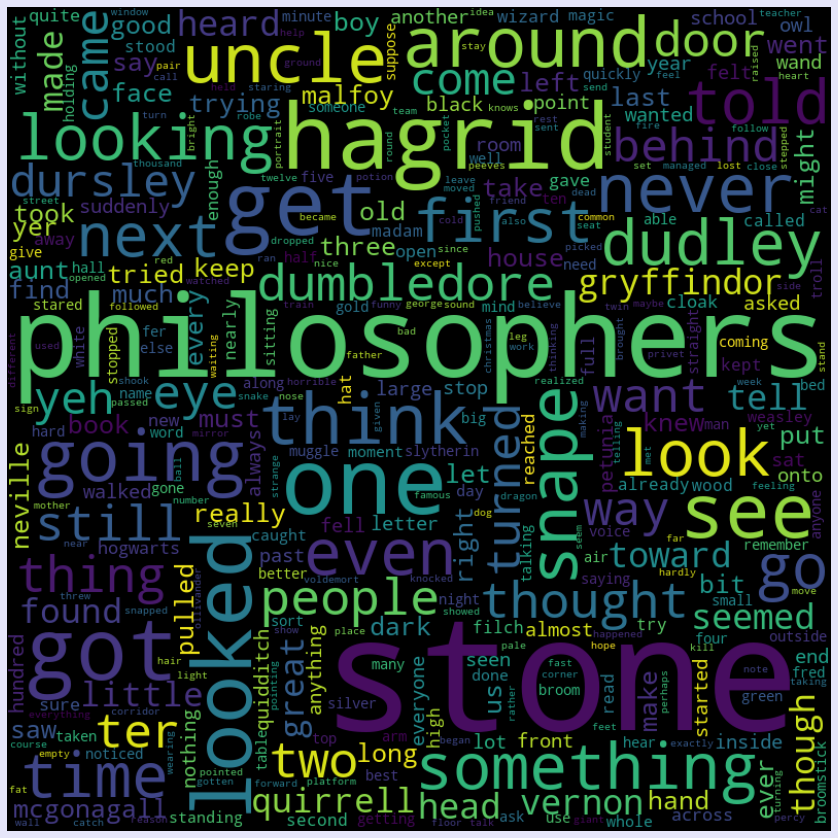

'boy lived number privet proud say perfectly thank last people expect involved anything strange hold dursley director firm called made beefy man hardly although large dursley thin blonde nearly twice usual amount came useful spent much time craning garden spying dursley small son called dudley opinion finer boy dursleys everything also greatest fear somebody discover think bear anyone found 2 philosophers stone met several dursley pretended sister husband undursleyish possible dursleys shuddered think neighbors say potters arrived dursleys knew potters small never even seen boy another good reason keeping potters want dudley mixing child dursley woke gray tuesday story nothing cloudy sky outside suggest strange mysterious things soon happening dursley hummed picked boring tie dursley gossiped away happily wrestled screaming dudley high none noticed tawny owl flutter past half past dursley picked pecked dursley tried kiss dudley dudley tantrum throwing cereal chortled dursley left got c

In [17]:
make_wordcloud(book1_rs)

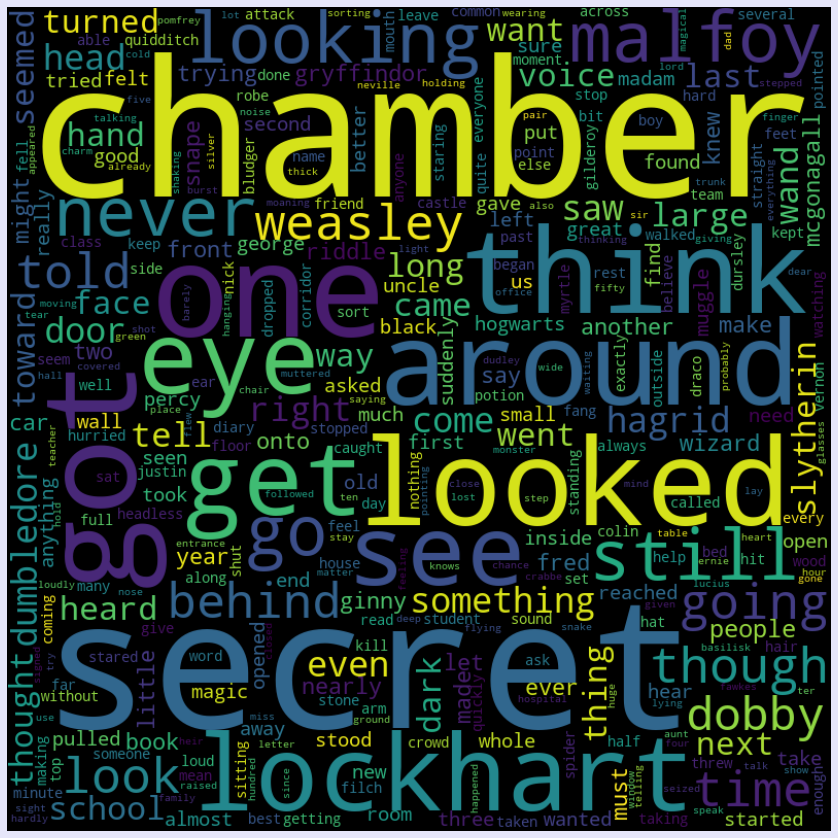

'r w l n g worst birthday first argument broken breakfast number privet vernon dursley woken early hours morning hooting noise nephew time roared across control yet used flying around let night look snarled uncle bit fried egg dangling bushy 11 happen let exchanged dark looks tried argue words drowned loud belch 2 chamber secrets want frying aunt turning misty eyes massive must build got sound school never went hungry uncle vernon gets large bottom drooped either side kitchen grinned turned frying forgotten magic effect simple sentence rest family dudley gasped fell chair crash shook whole dursley gave small scream clapped hands dursley jumped veins throbbing meant mean told thundered spraying spit saying word dare threaten roared uncle pounding table 3 chamber secrets warned tolerate mention abnormality stared uncle pale trying heave dudley right uncle vernon sat breathing winded rhinoceros watching closely corners sharp ever since come home summer uncle vernon treating bomb might go 

In [18]:
make_wordcloud(book2_rs)

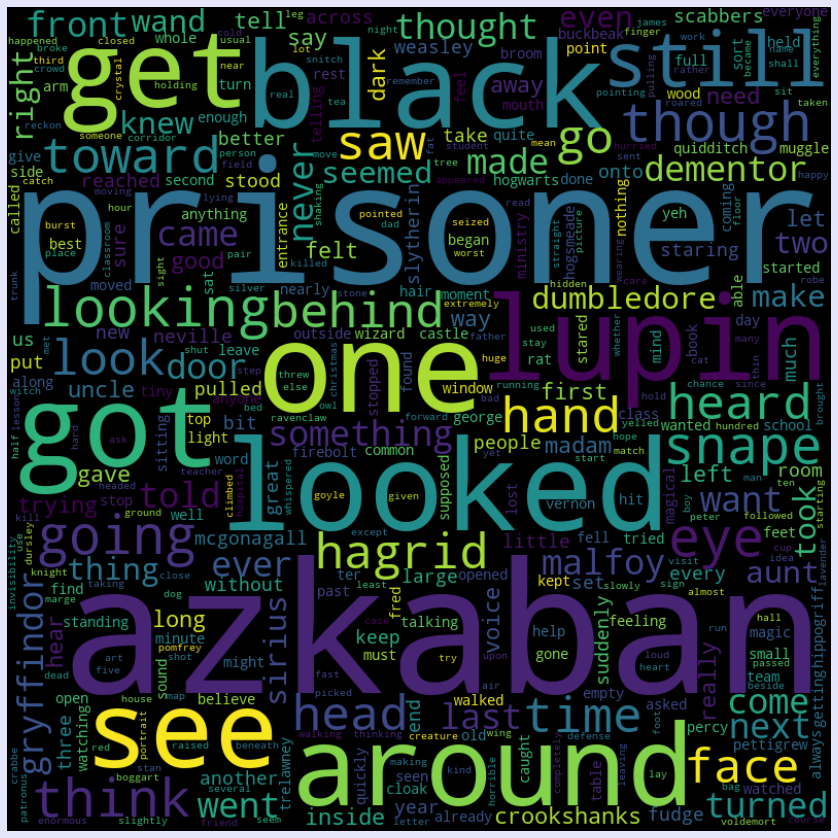

'owl post highly unusual boy many one hated summer holidays time really wanted homework forced dead also happened nearly lying stomach blankets drawn right head flashlight one hand large book history magic bathilda propped open moved tip quill frowning looked something help write burning fourteenth century completely pointless quill paused top pushed round glasses bridge moved flashlight closer 2 prisoner azkaban people commonly known particularly afraid magic medieval good recognizing rare occasion catch real witch burning effect witch wizard perform basic flame freezing charm pretend shriek pain enjoying tickling wendelin weird enjoyed burned much allowed caught less times various put quill teeth reached underneath pillow ink bottle roll slowly carefully unscrewed ink dipped quill began pausing every dursleys heard scratching quill way probably find locked cupboard stairs rest dursley family number privet reason never enjoyed summer uncle aunt living medieval attitude toward dead wit

In [19]:
make_wordcloud(book3_rs)

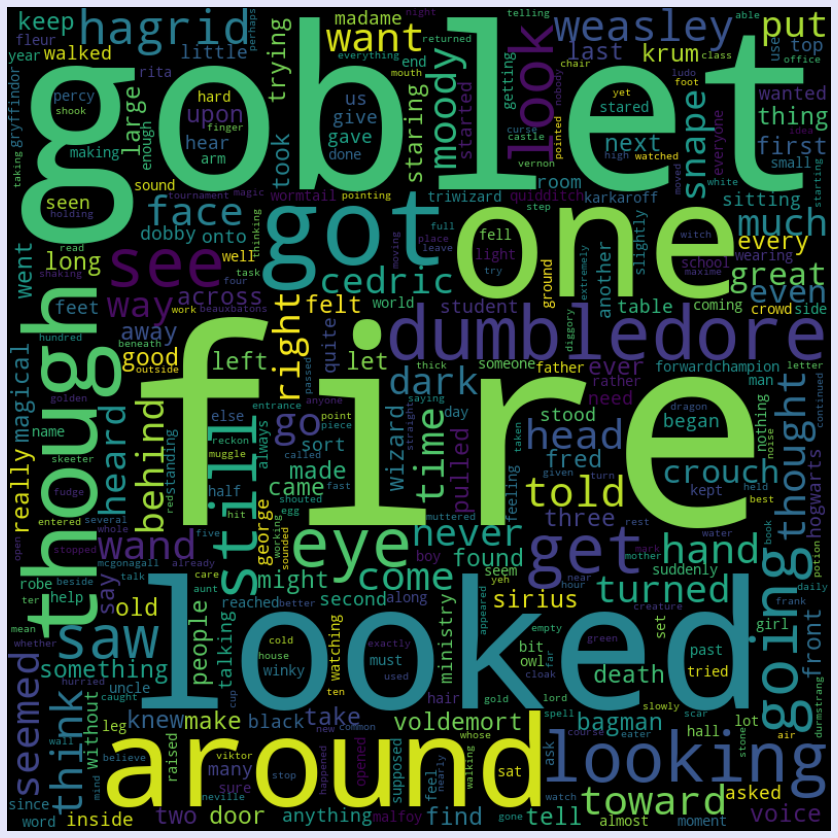

'riddle house villagers little hangleton still called riddle even though many years since riddle family lived stood hill overlooking windows tiles missing ivy spreading unchecked easily largest grandest building miles riddle house little hangletons agreed old house half century something strange horrible happened something older inhabitants village still liked discuss topics gossip story picked many embroidered many nobody quite sure truth every version started fifty years daybreak fine riddle house still well 2 goblet fire kept maid entered drawing room find three riddles maid run screaming hill village roused many people eyes wide cold still dinner police whole little hangleton seethed shocked curiosity disguised nobody wasted breath pretending feel sad elderly riddle villagers cared identity murderer three apparently healthy people drop dead natural causes hanged village roaring trade whole village seemed turned discuss rewarded leaving firesides cook arrived dramatically midst anno

In [20]:
make_wordcloud(book4_rs)

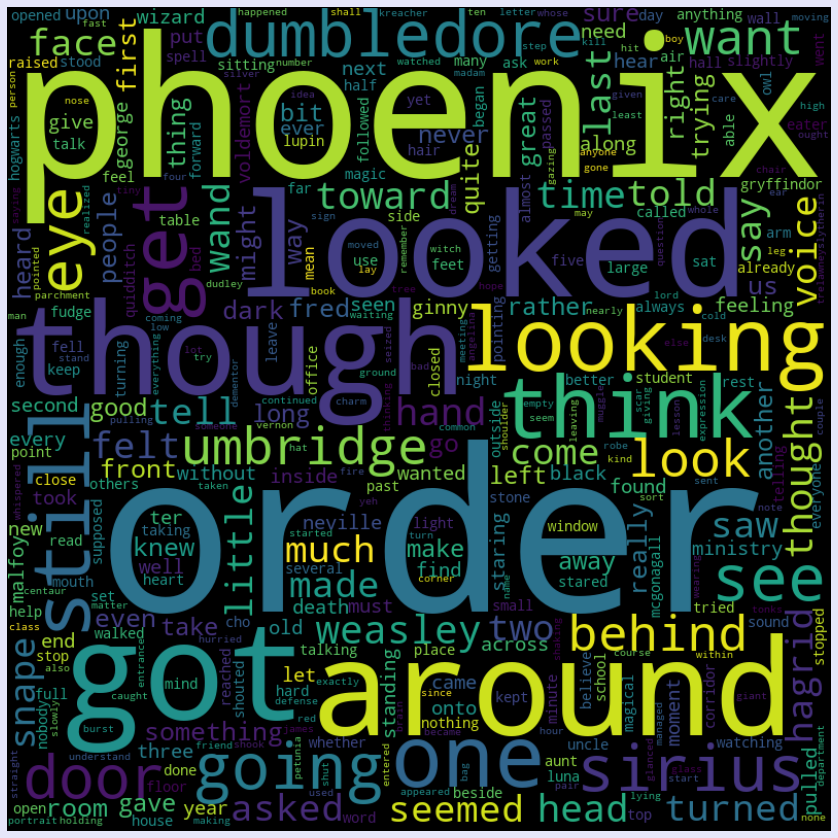

'dudley demented hottest day summer far drawing close drowsy silence lay square houses privet cars usually gleaming stood dusty drives lawns emerald green lay parched use hosepipes banned due deprived usual inhabitants privet drive retreated shade cool windows thrown wide hope tempting nonexistent person left outdoors teenage boy lying flat flower bed outside number bespectacled boy slightly unhealthy look someone grown lot short space jeans torn baggy soles trainers peeling away appearance endear sort people thought scruffiness ought 2 order phoenix punishable hidden behind large hydrangea bush evening quite invisible way spotted uncle vernon aunt petunia stuck heads living room window looked straight flower bed thought congratulated idea hiding comfortable lying hard nobody glaring grinding teeth loudly hear shooting nasty questions happened every time tried sitting living room watching television aunt almost though thought fluttered open vernon suddenly see stopped trying butt aunt 

In [21]:
make_wordcloud(book5_rs)

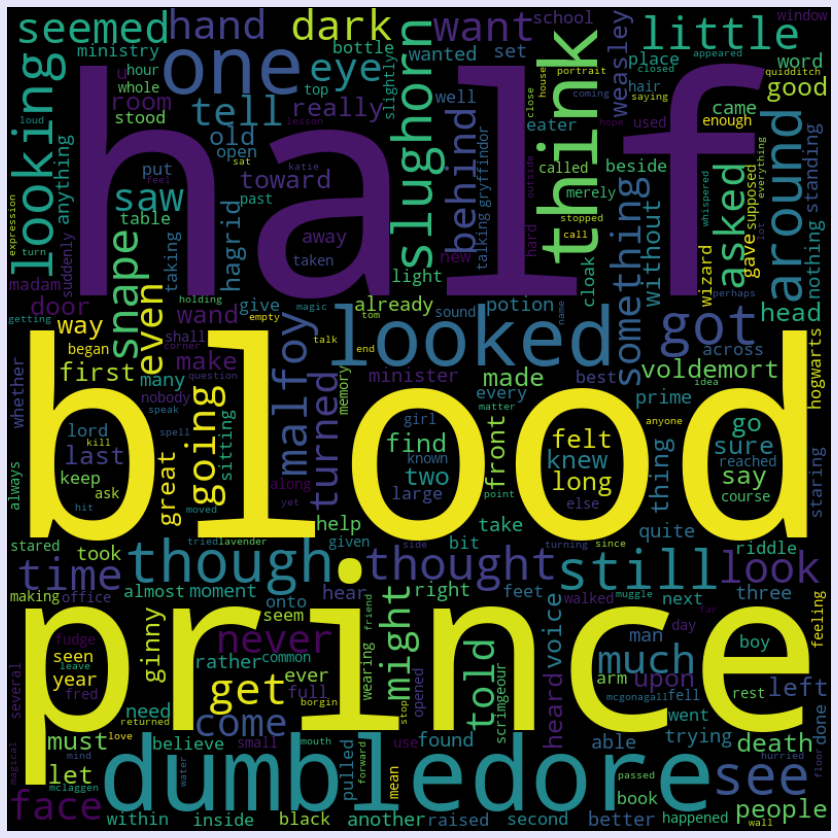

'minister nearing midnight prime minister sitting alone reading long memo slipping brain without leaving slightest trace meaning waiting call president far distant wondering wretched man trying suppress unpleasant memories difficult much space head anything attempted focus print clearly prime minister see gloating face one political particular opponent appeared news enumerate terrible things happened last week though anyone needed also explain every one prime pulse quickened thought neither fair earth government 2 half blood prince supposed stopped bridge outrageous anybody suggest spending enough bridge fewer ten years best experts loss explain snapped cleanly sending dozen cars watery depths river dare anyone suggest lack policemen resulted two nasty government somehow foreseen freak hurricane west country caused much damage people fault one junior herbert chosen week act peculiarly going spending lot time grim mood gripped opponent barely concealing broad perfectly prime minister fe

In [22]:
make_wordcloud(book6_rs)

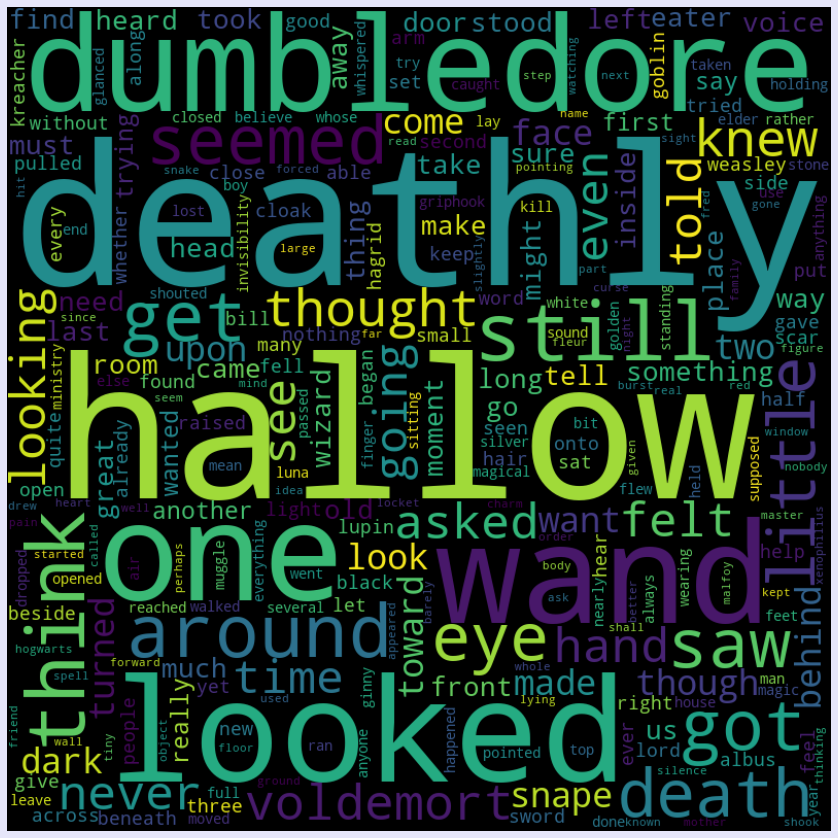

'dark lord ascending two men appeared yards apart moonlit second stood quite wands directed recognizing stowed wands beneath cloaks started walking briskly asked taller replied severus lane bordered left growing right neatly manicured long cloaks flapped around ankles might blunt features sliding sight branches overhanging trees broke little trickier hope sound confident reception 2 deathly hallows snape turned wide driveway led high hedge curved running distance beyond pair impressive gates barring neither broke silence raised left arms kind salute passed straight though dark metal yew hedges muffled sound rustle somewhere yaxley drew wand pointing source noise proved nothing strutting majestically along top always peacocks yaxley thrust wand cloak handsome manor house grew darkness end straight lights glinting downstairs somewhere dark garden beyond hedge fountain gravel crackled beneath feet snape yaxley sped toward front swung inward though nobody visibly opened hallway dimly sumpt

In [23]:
make_wordcloud(book7_rs)